In [1]:
# newer version of tensorflow might not need this
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warnings

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub


print("NP version:", np.__version__)
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

2024-01-20 03:47:24.085555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 03:47:24.085598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 03:47:24.086328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NP version: 1.26.2
TF version: 2.15.0
Hub version: 0.15.0
GPU available (YESS!!!!)


In [8]:
# Load the data
data = pd.read_csv('../data/moore.csv', header=None).to_numpy()
print(data.shape)
data[:10]

(162, 2)


array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]])

In [10]:
data[:, 0]

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976, 1976,
       1978, 1978, 1979, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1984,
       1985, 1985, 1985, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988,
       1988, 1989, 1989, 1989, 1989, 1990, 1991, 1991, 1992, 1992, 1993,
       1993, 1994, 1994, 1995, 1999, 1995, 1996, 1997, 1997, 1997, 1998,
       1999, 1999, 2000, 2000, 1999, 1999, 1999, 2000, 2001, 2001, 2002,
       2004, 2004, 2005, 2006, 2005, 2006, 2007, 2008, 2003, 2003, 2002,
       2005, 2005, 2006, 2007, 2003, 2008, 2009, 2011, 2012, 2007, 2007,
       2008, 2004, 2007, 2008, 2008, 2007, 2009, 2010, 2012, 2013, 2011,
       2010, 2010, 2012, 2012, 2010, 2012, 2014, 2006, 2015, 2013, 2015,
       2008, 2010, 2014, 2015, 2015, 2012, 2011, 2010, 2014, 2011, 2012,
       2014, 2016, 2017, 2017, 2018, 2012, 2016, 2016, 2015, 2013, 2017,
       2014, 2017, 2017, 2017, 2012, 2013, 2014, 2017, 2018, 2016, 2018,
       2017, 2018, 2017, 2015, 2017, 2016, 2017, 20

In [15]:
X = data[:, 0].reshape(-1, 1) # Making an N x columns
X[:10]

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976]])

In [17]:
Y = data[:, 1]
Y[:10]

array([2300, 3500, 2500, 2500, 4100, 4500, 8000, 3510, 5000, 8500])

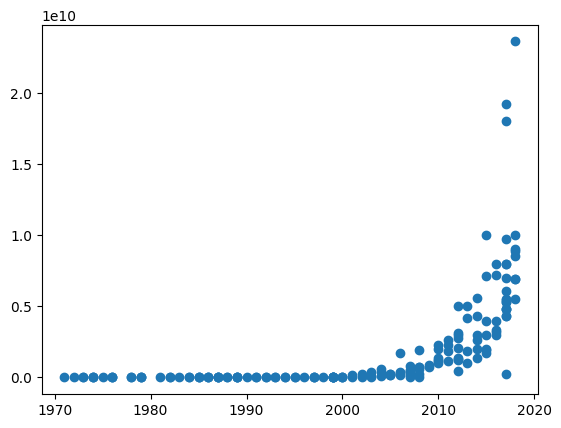

In [20]:
# Plot the data. It's growing exponentially, we wants it to be linear 
plt.scatter(X, Y)

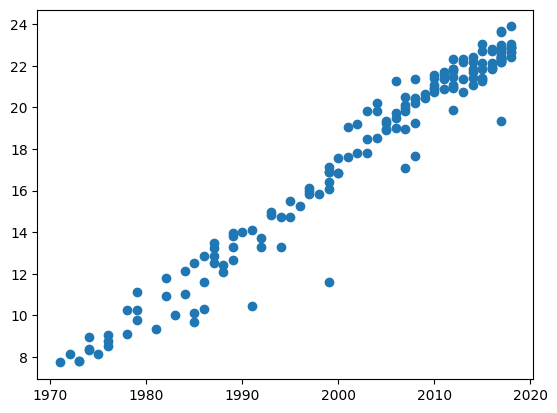

In [21]:
# Converting to Linear
Y = np.log(Y)
plt.scatter(X, Y)

In TensorFlow, as well as in other machine learning frameworks, it's common practice to translate data by shifting it down by its mean (also known as mean centering) during preprocessing, especially in regression tasks. This practice has several benefits:

1. **Improving Numerical Stability**: Data with large values can lead to numerical instability during the training process. Shifting the data to have a mean of zero centers the values around zero and typically reduces the magnitude of the values, leading to more stable calculations.

2. **Enhancing Optimization**: Many optimization algorithms used in training machine learning models, like gradient descent, work better and converge faster when the features are on a similar scale and centered around zero. This is because when features are on different scales, the gradients may also be on different scales, making it harder to find the optimal solution efficiently.

3. **Interpreting Model Parameters**: In regression models, centering the data makes the interpretation of model parameters more intuitive. Specifically, the intercept term in a linear regression model will represent the expected value of the dependent variable when all the independent variables are at their mean values.

4. **Reducing Collinearity**: In cases where the model includes interaction terms or polynomial terms, centering can reduce multicollinearity (a situation in which two or more variables are highly linearly related). This makes the model more stable and the estimates of the coefficients more reliable.

5. **Facilitating Feature Comparison**: When features are centered around zero, it's easier to compare the importance of different features by comparing their coefficients in the model. This is because the coefficients now effectively describe the change in the dependent variable for a one-unit change in the independent variable from its mean.

In summary, translating data by shifting it down by its mean in TensorFlow for regression tasks (and in general for most machine learning tasks) is a preprocessing step that can lead to more stable numerical computations, faster convergence during optimization, more interpretable model parameters, reduced collinearity, and easier feature comparison.

In [22]:
# translate the data by shifting it down by its mean. Mean centering
X = X - X.mean()

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(
    # Another form of gradient decent(loss function). 
    # Adjust the model parameters that make the model perform the best.
    # Because we didn't scale the data, optimization is harder. But there is a trade off.
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)
    

In [26]:
def schedule(epoch, learning_rate):
    if epoch >= 50:
        return 0.0001
    return 0.001

In [27]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

`LearningRateScheduler` in machine learning frameworks like TensorFlow and Keras is a tool used to adjust the learning rate during training. The learning rate is a crucial hyperparameter that determines the step size at each iteration while moving toward a minimum of a loss function. Here's why `LearningRateScheduler` is important and how it's used:

1. **Dynamic Learning Rate Adjustment**: Instead of keeping the learning rate constant throughout the training process, `LearningRateScheduler` allows you to change the learning rate dynamically. This can be based on various criteria, such as the number of epochs, the current loss score, or any custom criteria you define.

2. **Benefits of Adjusting Learning Rate**:
    - **Avoiding Local Minima**: At the start of training, a higher learning rate can help the algorithm to traverse the loss landscape quickly and avoid getting stuck in local minima.
    - **Fine-tuning**: As training progresses, reducing the learning rate can help the algorithm fine-tune the parameters and converge to the minimum more precisely.
    - **Stabilizing Training**: If the learning rate is too high, the training might be unstable. Dynamically reducing the learning rate can help stabilize the training process.

3. **Usage in Training**:
    - You define a learning rate schedule, which specifies how the learning rate should change over time (e.g., decrease the learning rate after every 10 epochs).
    - You pass this schedule to `LearningRateScheduler`, which then adjusts the learning rate according to this schedule during training.

4. **Common Scheduling Strategies**:
    - **Time-Based Decay**: Reduce the learning rate gradually based on the training epoch.
    - **Step Decay**: Reduce the learning rate by some factor every few epochs.
    - **Exponential Decay**: Decrease the learning rate exponentially, based on the number of epochs.
    - **Performance-Based Decay**: Lower the learning rate in response to the model's performance, such as when the improvement in loss falls below a certain threshold.

In summary, `LearningRateScheduler` is a tool that allows for the dynamic adjustment of the learning rate during the training of models, helping to improve convergence, avoid local minima, and potentially lead to better overall model performance.

In [28]:
trained_model = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 382.8880 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 302.1399 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 273.8400 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 250.0064 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 191.1070 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 146.9362 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 103.2886 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 79.6087 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 99.1033 - lr: 0.0010


I0000 00:00:1705724554.546710    6163 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 106.7753 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 40.7902 - lr: 0.0010
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 25.2730 - lr: 0.0010
Epoch 13/200
6/6 [==============================] - 0s 2ms/step - loss: 20.9650 - lr: 0.0010
Epoch 14/200
6/6 [==============================] - 0s 2ms/step - loss: 46.7696 - lr: 0.0010
Epoch 15/200
6/6 [==============================] - 0s 3ms/step - loss: 39.6051 - lr: 0.0010
Epoch 16/200
6/6 [==============================] - 0s 2ms/step - loss: 23.1140 - lr: 0.0010
Epoch 17/200
6/6 [==============================] - 0s 3ms/step - loss: 10.9367 - lr: 0.0010
Epoch 18/200
6/6 [==============================] - 0s 3ms/step - loss: 9.7436 - lr: 0.0010
Epoch 19/200
6/6 [==============================] - 0s 3ms/step - loss: 4.3379 - lr: 0.0010
Epoch 20/200
6/6 [==============================] - 0s 3ms/step - loss:

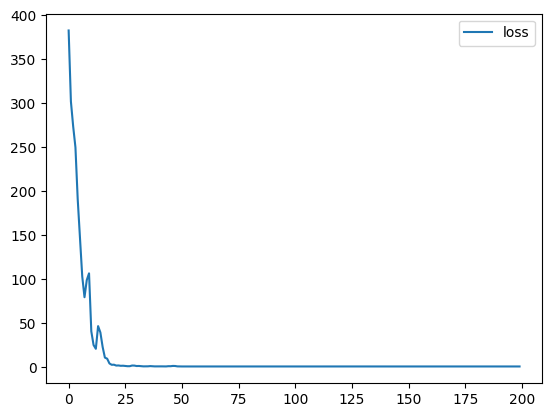

In [30]:
# Plot the loss
plt.plot(trained_model.history['loss'], label='loss')
plt.legend()

Maybe we have too many epoch

In [31]:
model.layers

In [35]:
model.layers[0].get_weights()

[array([[0.34181213]], dtype=float32), array([17.767948], dtype=float32)]

In [38]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.34181213

6/6 [==============================] - 1s 2ms/step
[7.104254 7.446066 7.787878 7.787878 8.12969  8.12969  8.12969  8.471502
 8.813314 8.813314]


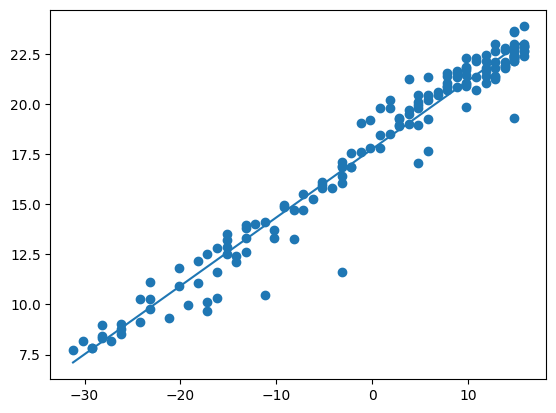

In [39]:
# Making Prediction
predict = model.predict(X).flatten()
print(predict[:10])
plt.scatter(X, Y)
plt.plot(X, predict)

In [42]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()
w, b

(array([[0.34181213]], dtype=float32), array([17.767948], dtype=float32))

In [41]:
X[:10]

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086]])

In [45]:
# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

In [46]:
X[:10]

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086]])

In [47]:
# (N x 1) x (1 x 1) + (1) --> (N x 1)
predict2 = (X.dot(w) + b).flatten()

In [48]:
# Don't use == for floating points
np.allclose(predict, predict2)

True